# Step 1:- Import the required libraries 


In [7]:
!pip install opencv-python

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow

#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix


import cv2
import os

import numpy as np

# Step 2:- Loading the data 

In [9]:
labels = ['crow', 'seagull']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [11]:
train = get_data('./Images/train')
val = get_data('./Images/test')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


# Step 3:- Visualize the data

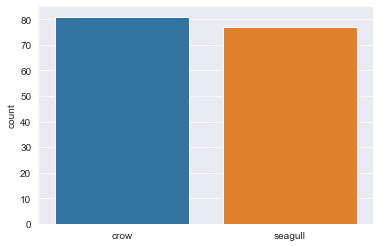

In [13]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("crow")
    else:
        l.append("seagull")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'crow')

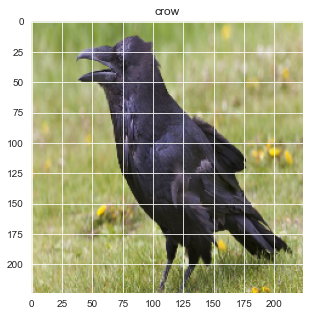

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'seagull')

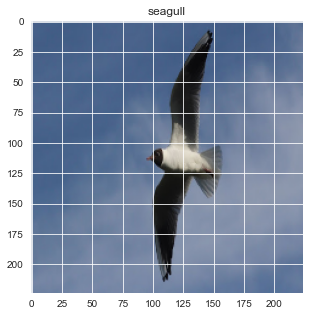

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

# Step 4:- Data Preprocessing and Data Augmentation

In [16]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Step 5:- Define the Model 

In [18]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [20]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [21]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


C:\Users\janlu\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 10s 2s/step - loss: 0.7177 - accuracy: 0.5316 - val_loss: 0.6765 - val_accuracy: 0.5312
Epoch 2/500
5/5 [==============================] - 7s 1s/step - loss: 0.7000 - accuracy: 0.5443 - val_loss: 0.6702 - val_accuracy: 0.5312
Epoch 3/500
5/5 [==============================] - 7s 1s/step - loss: 0.6972 - accuracy: 0.5190 - val_loss: 0.6646 - val_accuracy: 0.5312
Epoch 4/500
5/5 [==============================] - 7s 1s/step - loss: 0.6786 - accuracy: 0.5633 - val_loss: 0.6595 - val_accuracy: 0.5312
Epoch 5/500
5/5 [==============================] - 7s 1s/step - loss: 0.6696 - accuracy: 0.5506 - val_loss: 0.6543 - val_accuracy: 0.5625
Epoch 6/500
5/5 [==============================] - 7s 1s/step - loss: 0.6726 - accuracy: 0.6076 - val_loss: 0.6493 - val_accuracy: 0.6562
Epoch 7/500
5/5 [==============================] - 7s 1s/step - loss: 0.6562 - accuracy: 0.6139 - val_loss: 0.6447 - val_accuracy: 0.6875
Epoch 8/500
5/5 [============================

5/5 [==============================] - 6s 1s/step - loss: 0.4433 - accuracy: 0.8734 - val_loss: 0.4185 - val_accuracy: 0.9062
Epoch 61/500
5/5 [==============================] - 7s 1s/step - loss: 0.4512 - accuracy: 0.8418 - val_loss: 0.4144 - val_accuracy: 0.9062
Epoch 62/500
5/5 [==============================] - 7s 1s/step - loss: 0.4504 - accuracy: 0.8734 - val_loss: 0.4112 - val_accuracy: 0.9062
Epoch 63/500
5/5 [==============================] - 6s 1s/step - loss: 0.4388 - accuracy: 0.8671 - val_loss: 0.4093 - val_accuracy: 0.9062
Epoch 64/500
5/5 [==============================] - 6s 1s/step - loss: 0.4530 - accuracy: 0.8608 - val_loss: 0.4054 - val_accuracy: 0.9062
Epoch 65/500
5/5 [==============================] - 6s 1s/step - loss: 0.4356 - accuracy: 0.8481 - val_loss: 0.4016 - val_accuracy: 0.9062
Epoch 66/500
5/5 [==============================] - 7s 1s/step - loss: 0.4462 - accuracy: 0.8671 - val_loss: 0.3989 - val_accuracy: 0.9062
Epoch 67/500
5/5 [======================

5/5 [==============================] - 5s 979ms/step - loss: 0.3116 - accuracy: 0.9177 - val_loss: 0.2837 - val_accuracy: 0.9375
Epoch 119/500
5/5 [==============================] - 5s 966ms/step - loss: 0.3158 - accuracy: 0.9051 - val_loss: 0.2824 - val_accuracy: 0.9375
Epoch 120/500
5/5 [==============================] - 5s 964ms/step - loss: 0.3016 - accuracy: 0.9241 - val_loss: 0.2803 - val_accuracy: 0.9375
Epoch 121/500
5/5 [==============================] - 6s 1s/step - loss: 0.3106 - accuracy: 0.9114 - val_loss: 0.2792 - val_accuracy: 0.9375
Epoch 122/500
5/5 [==============================] - 5s 1s/step - loss: 0.3300 - accuracy: 0.8861 - val_loss: 0.2779 - val_accuracy: 0.9062
Epoch 123/500
5/5 [==============================] - 5s 971ms/step - loss: 0.3276 - accuracy: 0.8861 - val_loss: 0.2776 - val_accuracy: 0.9062
Epoch 124/500
5/5 [==============================] - 5s 1s/step - loss: 0.3101 - accuracy: 0.8861 - val_loss: 0.2768 - val_accuracy: 0.9062
Epoch 125/500
5/5 [===

5/5 [==============================] - 5s 1s/step - loss: 0.2412 - accuracy: 0.9241 - val_loss: 0.2107 - val_accuracy: 0.9375
Epoch 177/500
5/5 [==============================] - 6s 1s/step - loss: 0.2337 - accuracy: 0.9241 - val_loss: 0.2097 - val_accuracy: 0.9375
Epoch 178/500
5/5 [==============================] - 5s 1s/step - loss: 0.2339 - accuracy: 0.9367 - val_loss: 0.2095 - val_accuracy: 0.9375
Epoch 179/500
5/5 [==============================] - 5s 1s/step - loss: 0.2305 - accuracy: 0.9494 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 180/500
5/5 [==============================] - 5s 1s/step - loss: 0.2546 - accuracy: 0.9051 - val_loss: 0.2064 - val_accuracy: 0.9375
Epoch 181/500
5/5 [==============================] - 5s 1s/step - loss: 0.2426 - accuracy: 0.9051 - val_loss: 0.2063 - val_accuracy: 0.9375
Epoch 182/500
5/5 [==============================] - 5s 1s/step - loss: 0.2411 - accuracy: 0.9430 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 183/500
5/5 [===============

5/5 [==============================] - 5s 1s/step - loss: 0.2133 - accuracy: 0.9304 - val_loss: 0.1729 - val_accuracy: 0.9062
Epoch 235/500
5/5 [==============================] - 5s 1s/step - loss: 0.2070 - accuracy: 0.9114 - val_loss: 0.1711 - val_accuracy: 0.9062
Epoch 236/500
5/5 [==============================] - 5s 1s/step - loss: 0.1971 - accuracy: 0.9430 - val_loss: 0.1683 - val_accuracy: 0.9375
Epoch 237/500
5/5 [==============================] - 6s 1s/step - loss: 0.2102 - accuracy: 0.9304 - val_loss: 0.1665 - val_accuracy: 0.9375
Epoch 238/500
5/5 [==============================] - 6s 1s/step - loss: 0.1971 - accuracy: 0.9241 - val_loss: 0.1677 - val_accuracy: 0.9375
Epoch 239/500
5/5 [==============================] - 5s 1s/step - loss: 0.1953 - accuracy: 0.9304 - val_loss: 0.1695 - val_accuracy: 0.9062
Epoch 240/500
5/5 [==============================] - 5s 1s/step - loss: 0.1810 - accuracy: 0.9494 - val_loss: 0.1694 - val_accuracy: 0.9062
Epoch 241/500
5/5 [===============

5/5 [==============================] - 5s 1s/step - loss: 0.1648 - accuracy: 0.9494 - val_loss: 0.1412 - val_accuracy: 0.9688
Epoch 293/500
5/5 [==============================] - 5s 1s/step - loss: 0.1550 - accuracy: 0.9557 - val_loss: 0.1410 - val_accuracy: 0.9375
Epoch 294/500
5/5 [==============================] - 5s 1s/step - loss: 0.1789 - accuracy: 0.9367 - val_loss: 0.1402 - val_accuracy: 0.9688
Epoch 295/500
5/5 [==============================] - 6s 1s/step - loss: 0.1680 - accuracy: 0.9430 - val_loss: 0.1398 - val_accuracy: 0.9688
Epoch 296/500
5/5 [==============================] - 6s 1s/step - loss: 0.1660 - accuracy: 0.9367 - val_loss: 0.1391 - val_accuracy: 0.9688
Epoch 297/500
5/5 [==============================] - 5s 1s/step - loss: 0.1805 - accuracy: 0.9304 - val_loss: 0.1400 - val_accuracy: 0.9375
Epoch 298/500
5/5 [==============================] - 5s 1s/step - loss: 0.1840 - accuracy: 0.9114 - val_loss: 0.1390 - val_accuracy: 0.9375
Epoch 299/500
5/5 [===============

5/5 [==============================] - 5s 988ms/step - loss: 0.1349 - accuracy: 0.9557 - val_loss: 0.1172 - val_accuracy: 0.9688
Epoch 351/500
5/5 [==============================] - 5s 1s/step - loss: 0.1322 - accuracy: 0.9620 - val_loss: 0.1174 - val_accuracy: 0.9688
Epoch 352/500
5/5 [==============================] - 5s 1s/step - loss: 0.1371 - accuracy: 0.9557 - val_loss: 0.1176 - val_accuracy: 0.9688
Epoch 353/500
5/5 [==============================] - 5s 1000ms/step - loss: 0.1145 - accuracy: 0.9747 - val_loss: 0.1164 - val_accuracy: 0.9688
Epoch 354/500
5/5 [==============================] - 5s 996ms/step - loss: 0.1369 - accuracy: 0.9557 - val_loss: 0.1160 - val_accuracy: 0.9688
Epoch 355/500
5/5 [==============================] - 5s 984ms/step - loss: 0.1414 - accuracy: 0.9557 - val_loss: 0.1170 - val_accuracy: 0.9688
Epoch 356/500
5/5 [==============================] - 5s 988ms/step - loss: 0.1301 - accuracy: 0.9684 - val_loss: 0.1162 - val_accuracy: 0.9688
Epoch 357/500
5/5 

Epoch 408/500
5/5 [==============================] - 5s 1s/step - loss: 0.1161 - accuracy: 0.9684 - val_loss: 0.1029 - val_accuracy: 0.9688
Epoch 409/500
5/5 [==============================] - 5s 1s/step - loss: 0.1215 - accuracy: 0.9620 - val_loss: 0.1006 - val_accuracy: 0.9688
Epoch 410/500
5/5 [==============================] - 5s 991ms/step - loss: 0.1184 - accuracy: 0.9747 - val_loss: 0.0982 - val_accuracy: 0.9688
Epoch 411/500
5/5 [==============================] - 5s 990ms/step - loss: 0.1037 - accuracy: 0.9810 - val_loss: 0.0982 - val_accuracy: 0.9688
Epoch 412/500
5/5 [==============================] - 5s 991ms/step - loss: 0.1152 - accuracy: 0.9620 - val_loss: 0.0986 - val_accuracy: 0.9688
Epoch 413/500
5/5 [==============================] - 5s 988ms/step - loss: 0.1025 - accuracy: 0.9747 - val_loss: 0.1002 - val_accuracy: 0.9688
Epoch 414/500
5/5 [==============================] - 5s 977ms/step - loss: 0.1015 - accuracy: 0.9810 - val_loss: 0.1016 - val_accuracy: 0.9688
Epoch

5/5 [==============================] - 5s 1s/step - loss: 0.1012 - accuracy: 0.9747 - val_loss: 0.0882 - val_accuracy: 0.9688
Epoch 467/500
5/5 [==============================] - 5s 1s/step - loss: 0.0994 - accuracy: 0.9810 - val_loss: 0.0869 - val_accuracy: 0.9688
Epoch 468/500
5/5 [==============================] - 5s 1s/step - loss: 0.0996 - accuracy: 0.9810 - val_loss: 0.0870 - val_accuracy: 0.9688
Epoch 469/500
5/5 [==============================] - 5s 1s/step - loss: 0.0910 - accuracy: 0.9873 - val_loss: 0.0870 - val_accuracy: 0.9688
Epoch 470/500
5/5 [==============================] - 5s 1s/step - loss: 0.0827 - accuracy: 0.9873 - val_loss: 0.0866 - val_accuracy: 0.9688
Epoch 471/500
5/5 [==============================] - 5s 1s/step - loss: 0.0953 - accuracy: 0.9684 - val_loss: 0.0874 - val_accuracy: 0.9688
Epoch 472/500
5/5 [==============================] - 5s 1s/step - loss: 0.0911 - accuracy: 0.9873 - val_loss: 0.0877 - val_accuracy: 0.9688
Epoch 473/500
5/5 [===============

# Step 6:- Evaluating the result

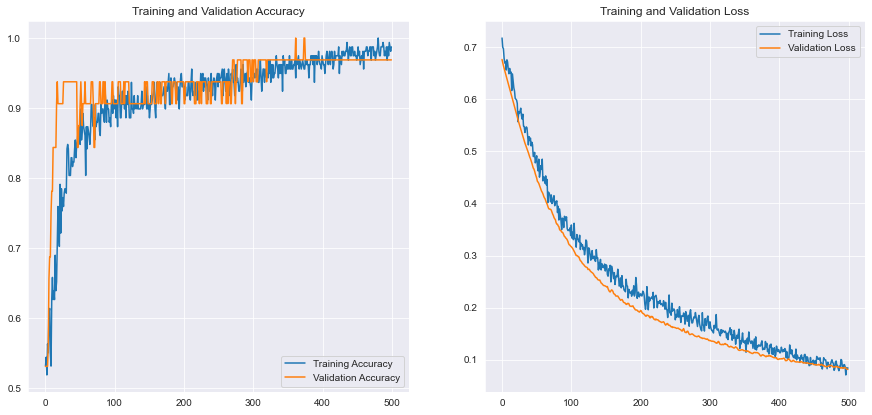

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
predictions = model.predict(x_val)
classes = predictions.argmax(axis=-1)
predictions = classes.reshape(1,-1)[0]
print(classification_report(y_val, classes, target_names = ['crow (Class 0)','seagull (Class 1)']))

                   precision    recall  f1-score   support

   crow (Class 0)       1.00      0.94      0.97        16
seagull (Class 1)       0.94      1.00      0.97        16

         accuracy                           0.97        32
        macro avg       0.97      0.97      0.97        32
     weighted avg       0.97      0.97      0.97        32

